In [43]:
import numpy as np
import random as r
from numpy import linalg as LA
uniform_=r.uniform
gauss_=r.gauss
def uniform(a=0, b=1):
    return uniform_(a, b)
def gauss():
    ret=-1
    while ret<0 or ret>1:
        ret=gauss_(.5, 0.15)
    return ret

def dot6(nums):
    nums*=10**6
    nums=np.floor(nums)
    nums/=10**6
    return nums
def norm(data):
    for i in range(len(data[0])):
        dmin=min(data[:, i])
        dmax=max(data[:, i])
        dd=dmax-dmin
        data[:,i]-=dmin
        data[:, i]/=dd
    return data
def dot6_norm(data):
    data=dot6(data)
    data=norm(data)
    return data

def gen_pdt_uni(n, d):
    ret=[]
    for i in range(n):
        ret.append([uniform() for _ in range(d)])
    return ret

def sample_point_uni(d, b=1.0):
    left=b
    ret=[]
    for i in range(d-1):
        tmp=(1-(uniform(0, 1))**(1/(d-i-1)))
        ret.append(left*tmp)
        left-=ret[-1]
    ret.append(left)
    return np.array(ret)

def sample_point_uni2(d, b=1.0):
    ret=[uniform(0, 1) for _ in range(d)]
    s=sum(ret)*b
    ret=[i/s for i in ret]
    return np.array(ret)

def gen_pdt_anti(n, d):
    ret=[]
    for _ in range(n):     
        e=gauss_(1.0, 0.03*d)
        ret.append(sample_point_uni(d, e))
#     # TODO more than 2 dimension
#     means=[.5, .5]
#     cov=[[1, -.95], [-.95, 1]]
#     ret=np.random.multivariate_normal(means, cov, n)
#     for i in range(d):
#         dmin=min(ret[:, i])
#         dmax=max(ret[:, i])
#         ret[:,i]-=dmin
#         ret[:,i]/=(dmax-dmin)
    return ret

def gen_pdt_corr(n, d):
    mean=[.5 for _ in range(d)]
    cov=[]
    for i in range(d):
        tmp=[]
        for j in range(d):
            if i==j:
                tmp.append(1)
            else:
                tmp.append(.95)
        cov.append(tmp)
    data = np.random.multivariate_normal(mean, cov, n)
    data=dot6_norm(data)
    return data
def gen_pdt_spherical(n, d):
    """
    here we use reject sampling
    """
    ret=set()
    while len(ret)<n:
        pdt=[uniform() for _ in range(d)]
        l2=LA.norm(pdt, 2)
        if l2>=0.8 and l2<=1.0:
            ret.add(tuple(pdt))
    return [list(pdt) for pdt in ret]

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def plot_user(user, save=False, fn='', format='pdf', label=['p[1]', 'p[2]'], s=32):
    fig, ax = plt.subplots()
    user_a = np.array(user).T
    ax.scatter(user_a[0], user_a[1], s=s, facecolors='none', edgecolors='blue')
    ax.set(xlim=(0, 1), ylim=(0, 1))
    ax.set_aspect('equal', 'box')
#     ax.set_xlabel(label[0])
#     ax.set_ylabel(label[1])
    if save:
        plt.savefig(fn + '.'+format, format=format, bbox_inches='tight')
        plot_user(user)
    else:
        plt.show()

def plot_pdt(pdt, save=False, fn='', format='pdf', s=32):
    plot_user(pdt, save, fn, format=format,label=['w[1]', 'w[2]'], s=s)

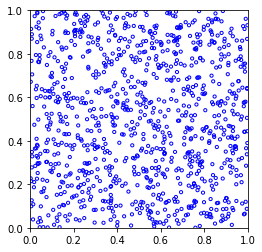

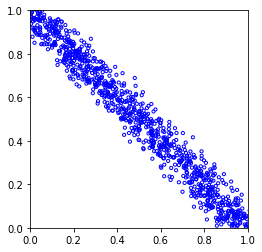

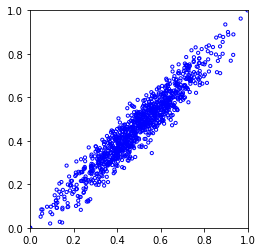

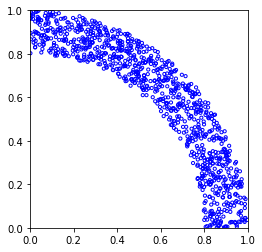

In [44]:
cardD=1000

pdt_uni=gen_pdt_uni(cardD, 2)
pdt_anti=gen_pdt_anti(cardD, 2)
pdt_corr=gen_pdt_corr(cardD, 2)
pdt_sph=gen_pdt_spherical(cardD, 2)
plot_pdt(pdt_uni, s=10)
plot_pdt(pdt_anti, s=10)
plot_pdt(pdt_corr, s=10)
plot_pdt(pdt_sph, s=10)

In [45]:
pdt_anti3d=gen_pdt_anti(cardD, 3)
pdt_sph3d=gen_pdt_spherical(cardD, 3)

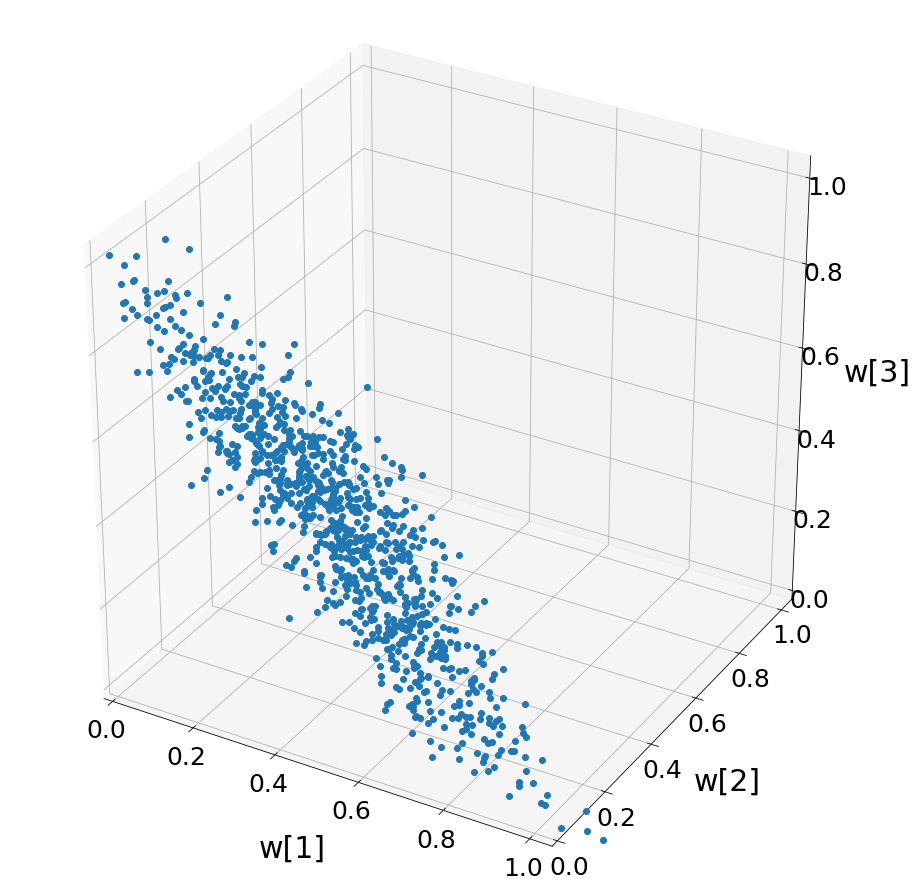

In [47]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
# ax.view_init(azim=45, elev=90*np.arccos(1.0/(3.0**0.5))/(np.pi/2))
ax.set_xlabel('w[1]', fontsize=30, labelpad=30)
ax.set_ylabel('w[2]', fontsize=30, labelpad=30)
ax.set_zlabel('w[3]', fontsize=30, labelpad=30)
ax.tick_params('x', labelsize=25)
ax.tick_params('y', labelsize=25)
ax.tick_params('z', labelsize=25)
ax.set(xlim=(0, 1.03), ylim=(0, 1.03), zlim=(0, 1.03))
ax.plot([i[0] for i in pdt_anti3d], [i[1] for i in pdt_anti3d], [i[2] for i in pdt_anti3d] , 'o')
plt.show()

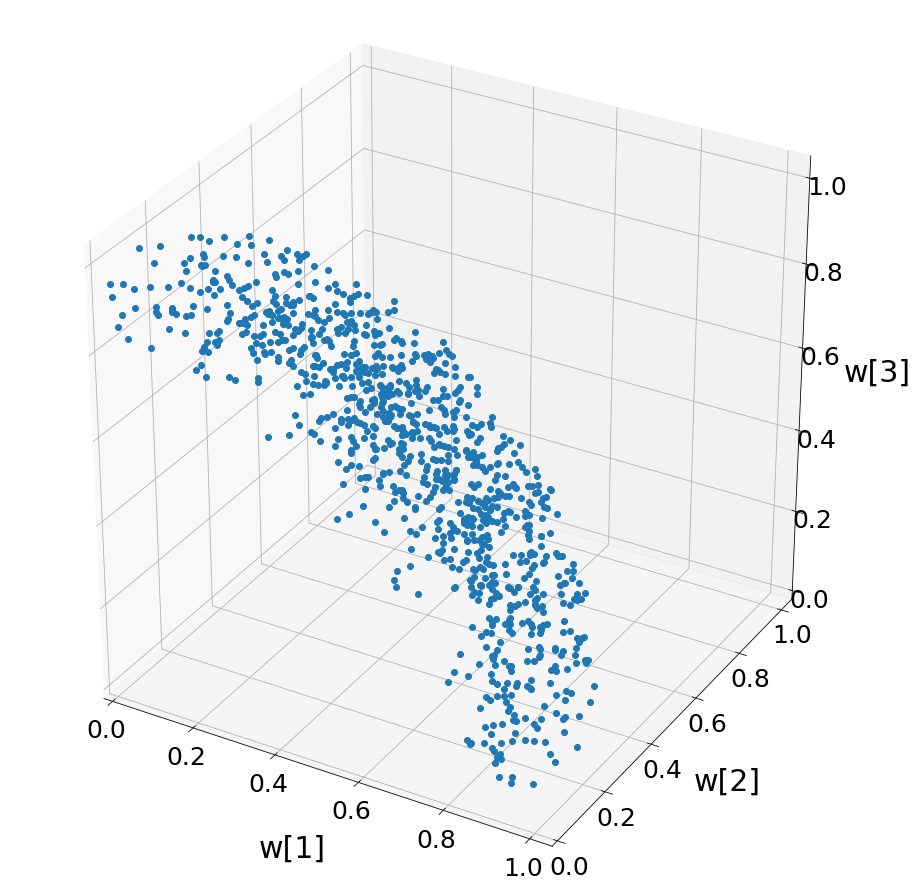

In [42]:
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1, 1, 1])
# ax.view_init(azim=45, elev=90*np.arccos(1.0/(3.0**0.5))/(np.pi/2))
ax.set_xlabel('w[1]', fontsize=30, labelpad=30)
ax.set_ylabel('w[2]', fontsize=30, labelpad=30)
ax.set_zlabel('w[3]', fontsize=30, labelpad=30)
ax.tick_params('x', labelsize=25)
ax.tick_params('y', labelsize=25)
ax.tick_params('z', labelsize=25)
ax.set(xlim=(0, 1.03), ylim=(0, 1.03), zlim=(0, 1.03))
ax.plot([i[0] for i in pdt_sph3d], [i[1] for i in pdt_sph3d], [i[2] for i in pdt_sph3d] , 'o')
plt.show()

In [49]:
wfile = 'cs5_anti1K3d_la.txt'
wf = open(wfile, "w")
wf.write("")
wf.close()
wf = open(wfile, "a")
SL=0.0001
for i,v in zip(range(len(pdt_anti3d)), pdt_anti3d):
#     wf.write("%d "%(i+1))
#     wf.write("%.6f "%(v[0]-SL))
#     wf.write("%.6f "%(v[0]-SL))
    wf.write("%.6f "%(v[0]))
    wf.write("%.6f "%(v[1]))
    wf.write("%.6f "%(v[2]))
    wf.write("\n") 
    # print("%.4f"%l[0], "%.4f"%l[1], "%.4f"%l[2], "%.4f"%l[3])
wf.close()

In [50]:
wfile = 'cs5_anti1K2d_la.txt'
wf = open(wfile, "w")
wf.write("")
wf.close()
wf = open(wfile, "a")
SL=0.0001
for i,v in zip(range(len(pdt_anti)), pdt_anti):
#     wf.write("%d "%(i+1))
#     wf.write("%.6f "%(v[0]-SL))
#     wf.write("%.6f "%(v[0]-SL))
    wf.write("%.6f "%(v[0]))
    wf.write("%.6f "%(v[1]))
    wf.write("\n") 
    # print("%.4f"%l[0], "%.4f"%l[1], "%.4f"%l[2], "%.4f"%l[3])
wf.close()

In [51]:
wfile = 'cs5_sph1K3d_la.txt'
wf = open(wfile, "w")
wf.write("")
wf.close()
wf = open(wfile, "a")
SL=0.0001
for i,v in zip(range(len(pdt_sph3d)), pdt_sph3d):
#     wf.write("%d "%(i+1))
#     wf.write("%.6f "%(v[0]-SL))
#     wf.write("%.6f "%(v[0]-SL))
    wf.write("%.6f "%(v[0]))
    wf.write("%.6f "%(v[1]))
    wf.write("%.6f "%(v[2]))
    wf.write("\n") 
    # print("%.4f"%l[0], "%.4f"%l[1], "%.4f"%l[2], "%.4f"%l[3])
wf.close()

In [52]:
wfile = 'cs5_sph1K2d_la.txt'
wf = open(wfile, "w")
wf.write("")
wf.close()
wf = open(wfile, "a")
SL=0.0001
for i,v in zip(range(len(pdt_sph)), pdt_sph):
#     wf.write("%d "%(i+1))
#     wf.write("%.6f "%(v[0]-SL))
#     wf.write("%.6f "%(v[0]-SL))
    wf.write("%.6f "%(v[0]))
    wf.write("%.6f "%(v[1]))
    wf.write("\n") 
    # print("%.4f"%l[0], "%.4f"%l[1], "%.4f"%l[2], "%.4f"%l[3])
wf.close()